<a href="https://colab.research.google.com/github/Gus-1003/TADS_Projeto_PalmaS/blob/main/ExperimentoCirculosBrancos/test3_professor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

from google.colab.patches import cv2_imshow

In [2]:
drive.mount('/content/drive')
Img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/fig_control_1.jpg")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


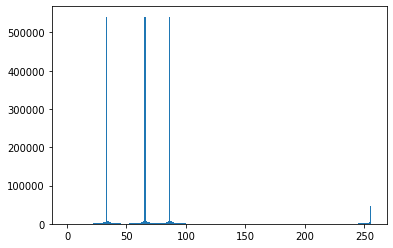

In [3]:
bgrImg = Img
rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)

plt.hist(rgbImg.ravel(),256,[0,256])
plt.show()

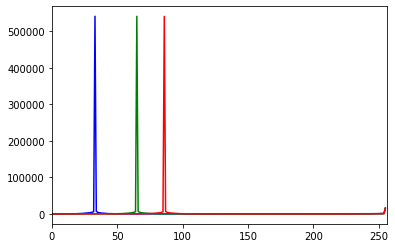

In [4]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([rgbImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

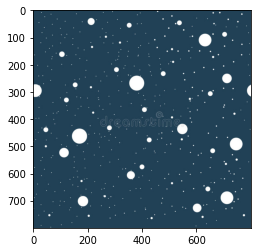

In [5]:
plt.imshow(rgbImg)

In [6]:
r1 = (180, 180, 180)
r2 = (255, 255, 255)

mask = cv2.inRange(rgbImg, r1, r2) # Mascara (Fundo preto e elementos brancos)
mask_inv = cv2.bitwise_not(mask) # Mascara com suas tonalidades negadas

grayImg = cv2.cvtColor(rgbImg, cv2.COLOR_RGB2GRAY) # Imagem em tons de cinza
blurImgG = cv2.GaussianBlur(grayImg, (7, 7), 0) # Borrou a imagem
blurImgM = cv2.medianBlur(grayImg, 5) # Extraiu as de menor ruido

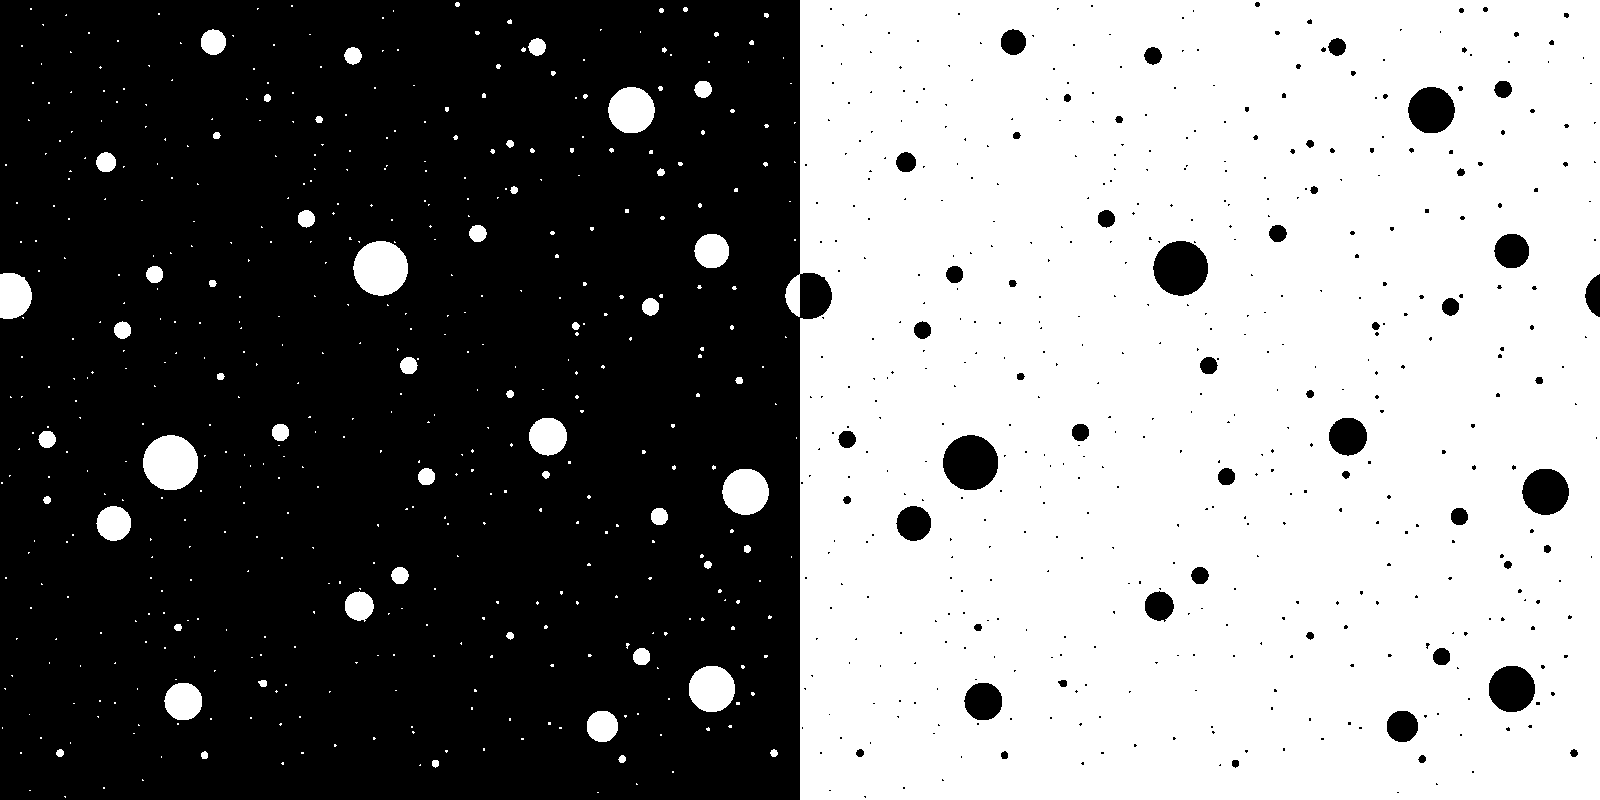

In [7]:
cv2_imshow(cv2.hconcat([mask, mask_inv])) #hconcat = Concatena imagens Horizontalmente

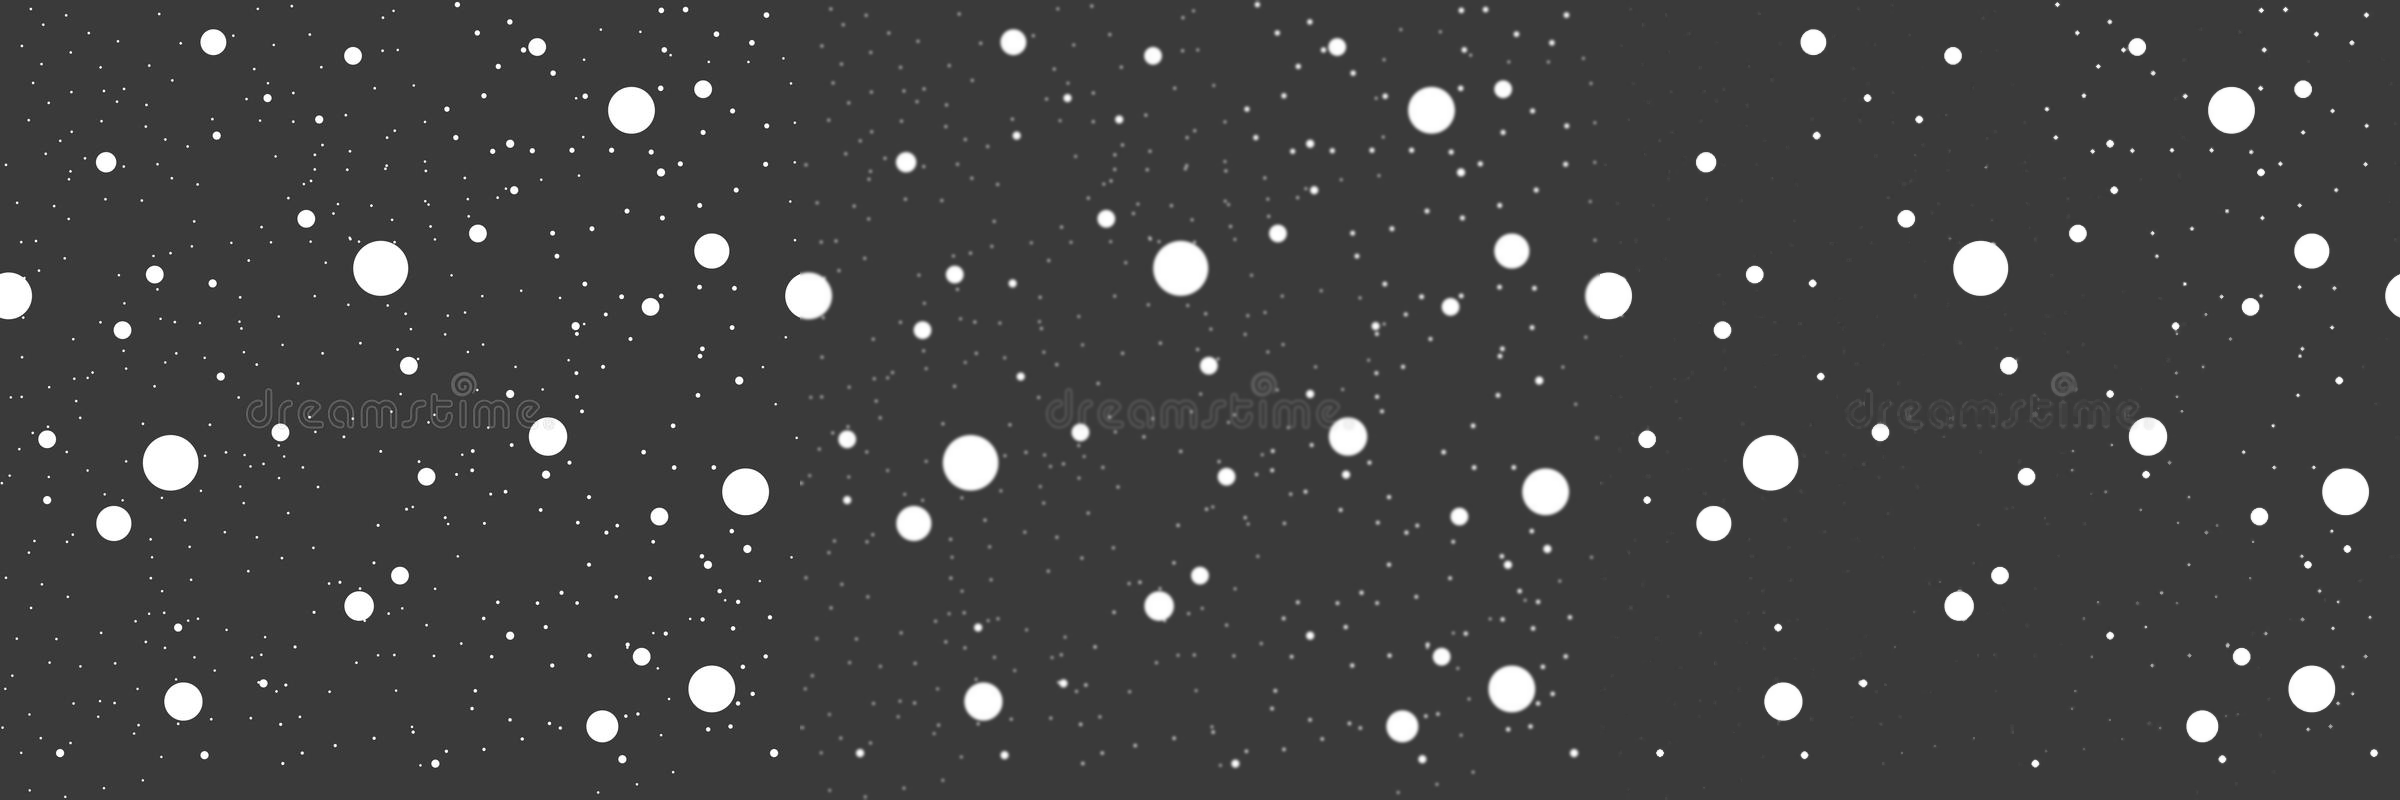

In [8]:
cv2_imshow(cv2.hconcat([grayImg, blurImgG, blurImgM])) #hconcat = Concatena imagens Horizontalmente

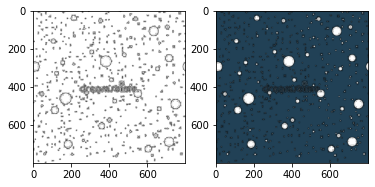

In [9]:
ret, mask = cv2.threshold(blurImgM, 160, 255, cv2.THRESH_BINARY)

mask = cv2.adaptiveThreshold(grayImg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)

result = cv2.bitwise_and(rgbImg, rgbImg, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

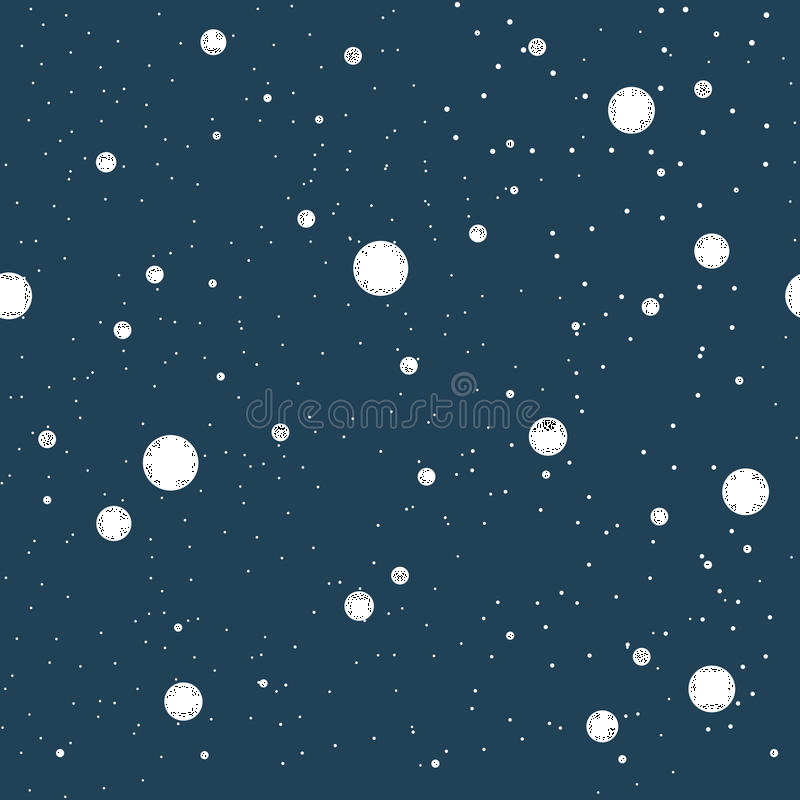

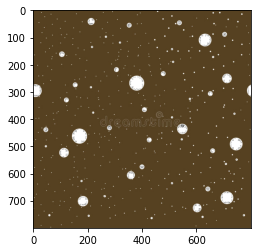

In [10]:
# Combine the two masks
final_mask = mask + mask_inv
result = cv2.bitwise_and(Img, Img, mask=final_mask)
cv2_imshow(result)
plt.imshow(result)

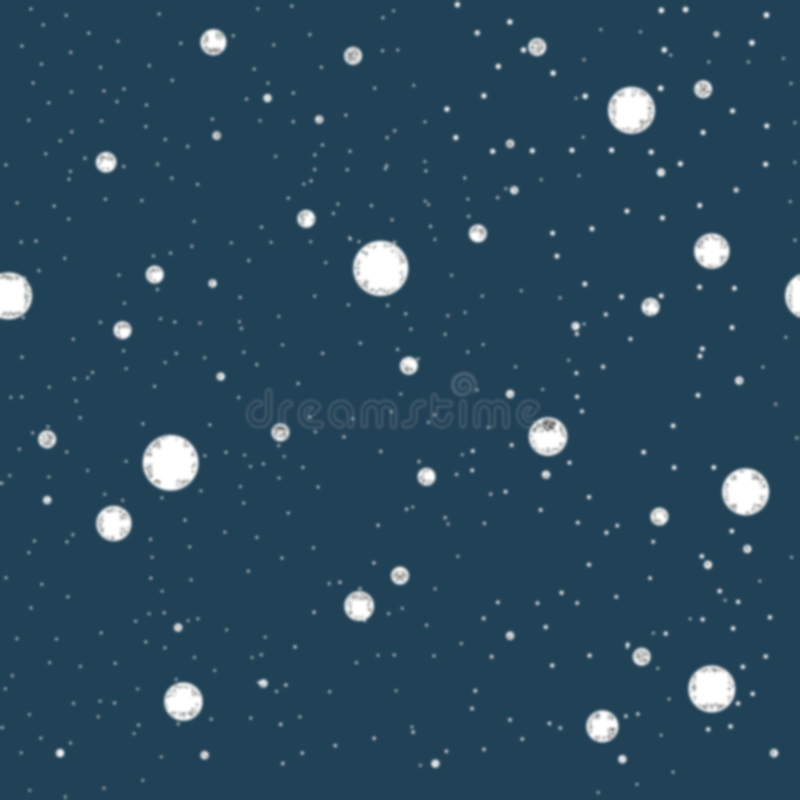

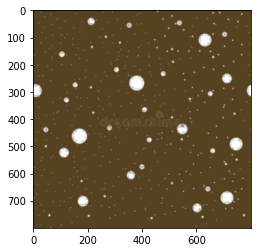

In [11]:
#Clean up the segmentation using a blur
blur = cv2.GaussianBlur(result, (7, 7), 0)
cv2_imshow(blur)
plt.imshow(blur)

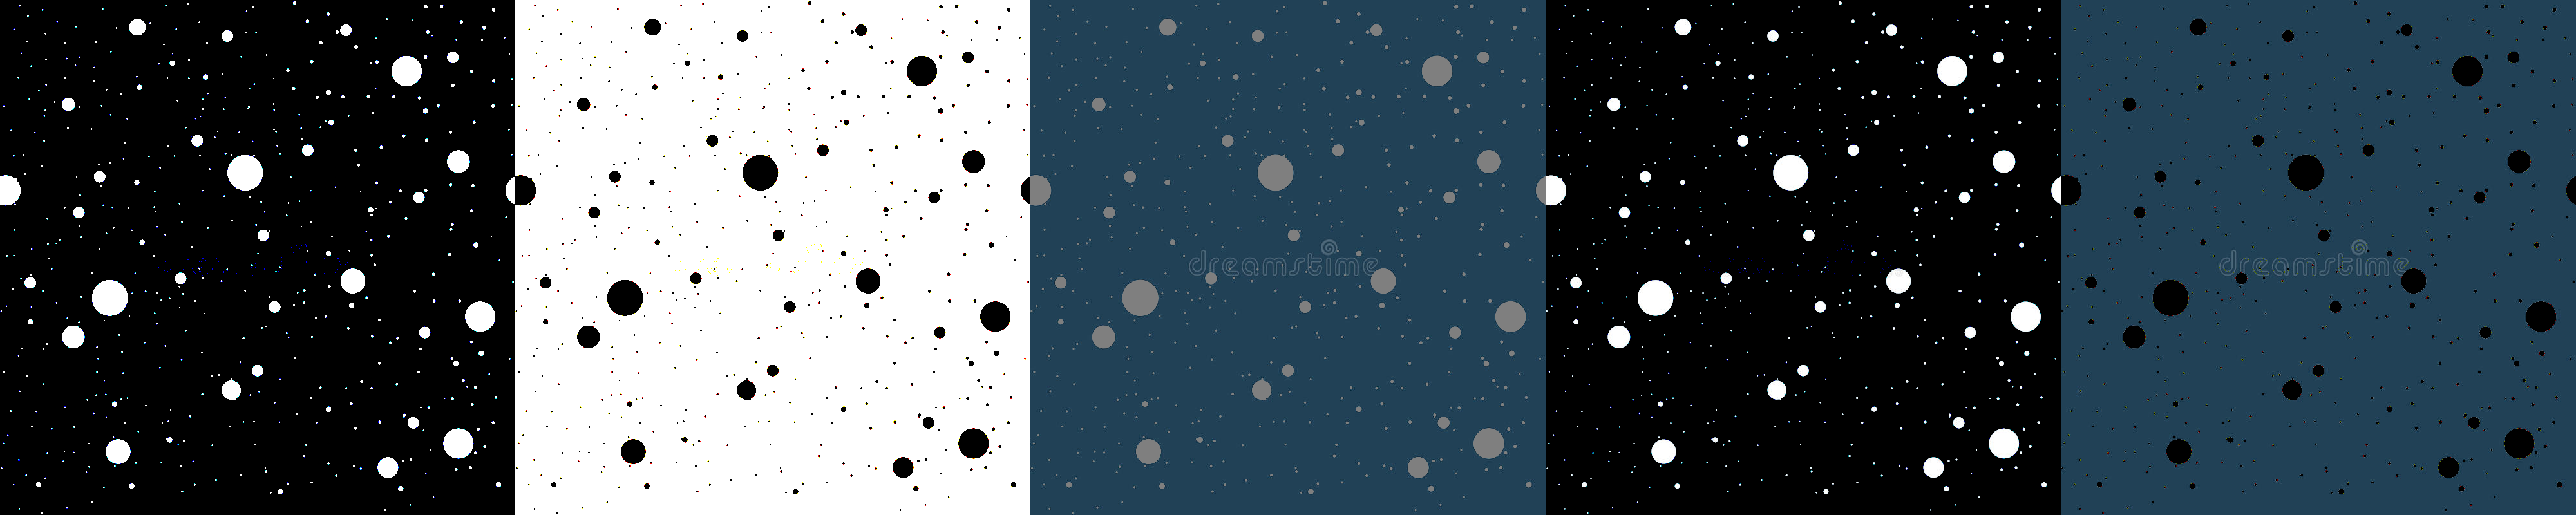

In [13]:
img = Img
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
cv2_imshow(cv2.hconcat([thresh1, thresh2, thresh3, thresh4, thresh5])) #hconcat = Concatena imagens Horizontalmente

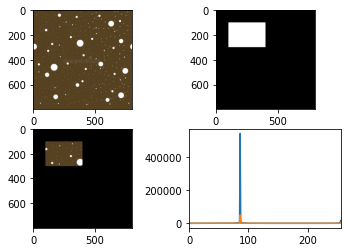

In [14]:
img2 = Img

# create a mask
mask = np.zeros(img2.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img2 = cv2.bitwise_and(img2,img2,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img2],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img2],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img2, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img2, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()